## Please, fill in before you start:

First Name: Majid

Last Name: Sohrabi

Group: ISSA (Data Science)

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [SiLiKhon](https://github.com/SiLiKhon), [dMeVdok](https://github.com/dmevdok), [oleges1](https://github.com/oleges1) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [57]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-09-26 20:43:35--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-09-26 20:43:36 (5.28 MB/s) - ‘train.csv.3’ saved [60302/60302]



In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [59]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

surv_class_1 = data[data['Pclass'] == 1]['Survived'].mean()
surv_class_2 = data[data['Pclass'] == 2]['Survived'].mean()
surv_class_3 = data[data['Pclass'] == 3]['Survived'].mean()

print('Survival rate for Pclass 1: ', surv_class_1)
print('Survival rate for Pclass 2: ', surv_class_2)
print('Survival rate for Pclass 3: ', surv_class_3)

Survival rate for Pclass 1:  0.6296296296296297
Survival rate for Pclass 2:  0.47282608695652173
Survival rate for Pclass 3:  0.24236252545824846


## Task 2 (1 point)

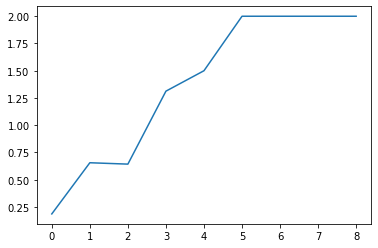

In [60]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

plt.plot(data.groupby('SibSp')['Parch'].mean());

## Task 3 (2 points)

In [61]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

def feature_selection_and_preprocessing(dataset):
  temp_features = dataset[["Fare", "Parch", "SibSp"]].copy()

  # We are using to normalize our data by MinMaxScaler()
  # This allow us to obtain the accuracy of 0.82
  min_max_scaler = preprocessing.MinMaxScaler()
  feature_scaled = min_max_scaler.fit_transform(temp_features)
  features = pd.DataFrame(feature_scaled)

  #features["Fare"] /= features["Fare"].mean()
  #features['Fare'] *= 0.5
  return features

model = KNeighborsClassifier(n_neighbors=20)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.82


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [62]:
from sklearn.model_selection import train_test_split

# Randomly spliting train / test
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=100, train_size=len(data)-100)

model = KNeighborsClassifier(n_neighbors=20)

model.fit(feature_selection_and_preprocessing(X_train), Y_train)
test_predictions = model.predict(feature_selection_and_preprocessing(X_test))

print("Test accuracy:", accuracy_score(
    Y_test,
    test_predictions
))

Test accuracy: 0.67


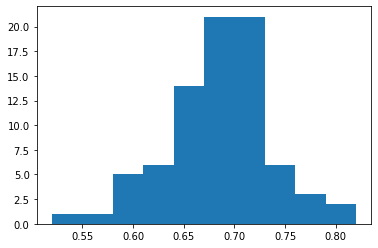

In [64]:
# Let us repeat the experiment 80 times
# to see the distribution of errors

model = KNeighborsClassifier(n_neighbors=20)

error_list = []
for iter in range(80):
  # Randomly spliting train / test
  X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=100, train_size=len(data)-100)

  model.fit(feature_selection_and_preprocessing(X_train), Y_train)
  test_predictions = model.predict(feature_selection_and_preprocessing(X_test))

  error_list.append(accuracy_score(Y_test, test_predictions))

# Plot the distribution of error
plt.hist(error_list);

Conclusion:

Based on the several execution the model will have different accuracies, and this is mainly because of the way data is splitting each time randomly.